<center>
    <img src="https://fael.edu.br/upload/cursos/interna/data-science-02-12-06-20-031446.png"  />
</center>

# Data Analysis: Data Visualization of Immigration

Anderson Cruz | London-UK | 
<a href="https://www.linkedin.com/in/anderjcruz/" target="_blank">Linkedin</a> | 
<a href="https://nowacapital.com" target="_blank">Nowa Capital</a>

### Project: Macroeconomic Indicator

## The Dataset: Immigration <a id="2"></a>


Dataset Source: [International migration flows to and from selected countries revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

In this project, I will focus on the Immigration data.

Dataset Preview: [Data Preview](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%201/images/DataSnapshot.png)

The Immigration dataset can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01">here</a>.

***


The first thing we'll do is install **openpyxl** (formerly **xlrd**), a module that *pandas* requires to read Excel files.


In [1]:
!mamba install openpyxl==3.0.9 -y

/usr/bin/sh: mamba: command not found


Next, we'll do is import two key data analysis modules: *pandas* and *numpy*.


In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Let's download and import our primary Canadian Immigration dataset using *pandas*'s `read_excel()` method.


In [3]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.


In [4]:
df_can.head()
# tip: You can specify the number of rows you'd like to see as follows: df_can.head(10) 

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2012  2013  \
0    Southern Asia  902  Developing regions    16  ...  2635  2004   
1  Southern Europe  901   Developed regions     1  ...   620   603   
2  Northern Africa  902  Developing regions    80  ...  3774  4331   
3        Polynesia  902  Developing regions     0  ...     0     0   
4  Southern Europe  901   Developed regions     0  ...     1     1   

   Unnamed: 43  Unnamed: 44  Unnamed: 45  Unnamed: 46  Unnamed: 47  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 48  Unnamed: 49  Unnamed: 50  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN  

[5 rows x 51 columns]

We can also view the bottom 5 rows of the dataset using the `tail()` function.


In [5]:
df_can.tail()

Type    Coverage          OdName  AREA AreaName  REG  \
190  Immigrants  Foreigners        Viet Nam   935     Asia  920   
191  Immigrants  Foreigners  Western Sahara   903   Africa  912   
192  Immigrants  Foreigners           Yemen   935     Asia  922   
193  Immigrants  Foreigners          Zambia   903   Africa  910   
194  Immigrants  Foreigners        Zimbabwe   903   Africa  910   

                RegName  DEV             DevName  1980  ...  2012  2013  \
190  South-Eastern Asia  902  Developing regions  1191  ...  1731  2112   
191     Northern Africa  902  Developing regions     0  ...     0     0   
192        Western Asia  902  Developing regions     1  ...   174   217   
193      Eastern Africa  902  Developing regions    11  ...    46    59   
194      Eastern Africa  902  Developing regions    72  ...   437   407   

     Unnamed: 43  Unnamed: 44  Unnamed: 45  Unnamed: 46  Unnamed: 47  \
190          NaN          NaN          NaN          NaN          NaN   
191          NaN          NaN          NaN          NaN          NaN   
192          NaN          NaN          NaN          NaN          NaN   
193          NaN          NaN          NaN          NaN          NaN   
194          NaN          NaN          NaN          NaN          NaN   

     Unnamed: 48  Unnamed: 49  Unnamed: 50  
190          NaN          NaN          NaN  
191          NaN          NaN          NaN  
192          NaN          NaN          NaN  
193          NaN          NaN          NaN  
194          NaN          NaN          NaN  

[5 rows x 51 columns]

Analyzing a dataset.. 

In [6]:
df_can.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 51 entries, Type to Unnamed: 50
dtypes: float64(8), int64(37), object(6)
memory usage: 77.8+ KB


List of column headers.


In [7]:
df_can.columns

Index([       'Type',    'Coverage',      'OdName',        'AREA',
          'AreaName',         'REG',     'RegName',         'DEV',
           'DevName',          1980,          1981,          1982,
                1983,          1984,          1985,          1986,
                1987,          1988,          1989,          1990,
                1991,          1992,          1993,          1994,
                1995,          1996,          1997,          1998,
                1999,          2000,          2001,          2002,
                2003,          2004,          2005,          2006,
                2007,          2008,          2009,          2010,
                2011,          2012,          2013, 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

In [8]:
df_can.index

RangeIndex(start=0, stop=195, step=1)

In [9]:
print(type(df_can.columns))
print(type(df_can.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [10]:
df_can.columns.tolist()

['Type',
 'Coverage',
 'OdName',
 'AREA',
 'AreaName',
 'REG',
 'RegName',
 'DEV',
 'DevName',
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 'Unnamed: 43',
 'Unnamed: 44',
 'Unnamed: 45',
 'Unnamed: 46',
 'Unnamed: 47',
 'Unnamed: 48',
 'Unnamed: 49',
 'Unnamed: 50']

In [11]:
df_can.index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [12]:
print(type(df_can.columns.tolist()))
print(type(df_can.index.tolist()))

<class 'list'>
<class 'list'>


Dimensions of the dataframe.


In [13]:
# size of dataframe (rows, columns)
df_can.shape    

(195, 51)

Let's clean the data set to remove a few unnecessary columns.


In [14]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head()

OdName AreaName          RegName             DevName  1980  1981  \
0     Afghanistan     Asia    Southern Asia  Developing regions    16    39   
1         Albania   Europe  Southern Europe   Developed regions     1     0   
2         Algeria   Africa  Northern Africa  Developing regions    80    67   
3  American Samoa  Oceania        Polynesia  Developing regions     0     1   
4         Andorra   Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2012  2013  Unnamed: 43  Unnamed: 44  \
0    39    47    71   340  ...  2635  2004          NaN          NaN   
1     0     0     0     0  ...   620   603          NaN          NaN   
2    71    69    63    44  ...  3774  4331          NaN          NaN   
3     0     0     0     0  ...     0     0          NaN          NaN   
4     0     0     0     0  ...     1     1          NaN          NaN   

   Unnamed: 45  Unnamed: 46  Unnamed: 47  Unnamed: 48  Unnamed: 49  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 50  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 46 columns]

Let's rename the columns so that they make sense. 

In [15]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([    'Country',   'Continent',      'Region',     'DevName',
                1980,          1981,          1982,          1983,
                1984,          1985,          1986,          1987,
                1988,          1989,          1990,          1991,
                1992,          1993,          1994,          1995,
                1996,          1997,          1998,          1999,
                2000,          2001,          2002,          2003,
                2004,          2005,          2006,          2007,
                2008,          2009,          2010,          2011,
                2012,          2013, 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

We will also add a 'Total' column that sums up the total immigrants by country over the entire period, as follows:


In [16]:
df_can['Total'] = df_can.sum(axis=1)

We can check to see how many null objects we have in the dataset as follows:


In [17]:
df_can.isnull().sum()

Country          0
Continent        0
Region           0
DevName          0
1980             0
1981             0
1982             0
1983             0
1984             0
1985             0
1986             0
1987             0
1988             0
1989             0
1990             0
1991             0
1992             0
1993             0
1994             0
1995             0
1996             0
1997             0
1998             0
1999             0
2000             0
2001             0
2002             0
2003             0
2004             0
2005             0
2006             0
2007             0
2008             0
2009             0
2010             0
2011             0
2012             0
2013             0
Unnamed: 43    195
Unnamed: 44    195
Unnamed: 45    195
Unnamed: 46    195
Unnamed: 47    195
Unnamed: 48    195
Unnamed: 49    195
Unnamed: 50    195
Total            0
dtype: int64

Finally, let's view a quick summary of each column in our dataframe using the `describe()` method.


In [18]:
df_can.describe()

1980          1981          1982          1983          1984  \
count    195.000000    195.000000    195.000000    195.000000    195.000000   
mean     508.394872    566.989744    534.723077    387.435897    376.497436   
std     1949.588546   2152.643752   1866.997511   1204.333597   1198.246371   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%       13.000000     10.000000     11.000000     12.000000     13.000000   
75%      251.500000    295.500000    275.000000    173.000000    181.000000   
max    22045.000000  24796.000000  20620.000000  10015.000000  10170.000000   

              1985         1986          1987          1988          1989  \
count   195.000000   195.000000    195.000000    195.000000    195.000000   
mean    358.861538   441.271795    691.133333    714.389744    843.241026   
std    1079.309600  1225.576630   2109.205607   2443.606788   2555.048874   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       0.000000     0.500000      0.500000      1.000000      1.000000   
50%      17.000000    18.000000     26.000000     34.000000     44.000000   
75%     197.000000   254.000000    434.000000    409.000000    508.500000   
max    9564.000000  9470.000000  21337.000000  27359.000000  23795.000000   

       ...          2013  Unnamed: 43  Unnamed: 44  Unnamed: 45  Unnamed: 46  \
count  ...    195.000000          0.0          0.0          0.0          0.0   
mean   ...   1320.702564          NaN          NaN          NaN          NaN   
std    ...   4237.951988          NaN          NaN          NaN          NaN   
min    ...      0.000000          NaN          NaN          NaN          NaN   
25%    ...     45.000000          NaN          NaN          NaN          NaN   
50%    ...    213.000000          NaN          NaN          NaN          NaN   
75%    ...    796.000000          NaN          NaN          NaN          NaN   
max    ...  34129.000000          NaN          NaN          NaN          NaN   

       Unnamed: 47  Unnamed: 48  Unnamed: 49  Unnamed: 50          Total  
count          0.0          0.0          0.0          0.0     195.000000  
mean           NaN          NaN          NaN          NaN   32867.451282  
std            NaN          NaN          NaN          NaN   91785.498686  
min            NaN          NaN          NaN          NaN       1.000000  
25%            NaN          NaN          NaN          NaN     952.000000  
50%            NaN          NaN          NaN          NaN    5018.000000  
75%            NaN          NaN          NaN          NaN   22239.500000  
max            NaN          NaN          NaN          NaN  691904.000000  

[8 rows x 43 columns]

Filtering on the list of countries ('Country').


In [19]:
df_can.Country  # returns a series

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

Filtering on the list of countries ('Country') and the data for years.


In [20]:
df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]] # returns a dataframe
# notice that 'Country' is string, and the years are integers. 
# for the sake of consistency, we will convert all column names to string later on.

Country  1980  1981  1982  1983  1984  1985
0       Afghanistan    16    39    39    47    71   340
1           Albania     1     0     0     0     0     0
2           Algeria    80    67    71    69    63    44
3    American Samoa     0     1     0     0     0     0
4           Andorra     0     0     0     0     0     0
..              ...   ...   ...   ...   ...   ...   ...
190        Viet Nam  1191  1829  2162  3404  7583  5907
191  Western Sahara     0     0     0     0     0     0
192           Yemen     1     2     1     6     0    18
193          Zambia    11    17    11     7    16     9
194        Zimbabwe    72   114   102    44    32    29

[195 rows x 7 columns]

Select Row

In [21]:
df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

In [22]:
df_can.head(3)

Continent           Region             DevName  1980  1981  1982  \
Country                                                                        
Afghanistan      Asia    Southern Asia  Developing regions    16    39    39   
Albania        Europe  Southern Europe   Developed regions     1     0     0   
Algeria        Africa  Northern Africa  Developing regions    80    67    71   

             1983  1984  1985  1986  ...  2013  Unnamed: 43  Unnamed: 44  \
Country                              ...                                   
Afghanistan    47    71   340   496  ...  2004          NaN          NaN   
Albania         0     0     0     1  ...   603          NaN          NaN   
Algeria        69    63    44    69  ...  4331          NaN          NaN   

             Unnamed: 45  Unnamed: 46  Unnamed: 47  Unnamed: 48  Unnamed: 49  \
Country                                                                        
Afghanistan          NaN          NaN          NaN          NaN          NaN   
Albania              NaN          NaN          NaN          NaN          NaN   
Algeria              NaN          NaN          NaN          NaN          NaN   

             Unnamed: 50    Total  
Country                            
Afghanistan          NaN  58639.0  
Albania              NaN  15699.0  
Algeria              NaN  69439.0  

[3 rows x 46 columns]

Remove the name of the index

In [23]:
df_can.index.name = None

The full row data (all columns)


In [24]:
df_can.loc['Japan']

Continent                   Asia
Region              Eastern Asia
DevName        Developed regions
1980                         701
1981                         756
1982                         598
1983                         309
1984                         246
1985                         198
1986                         248
1987                         422
1988                         324
1989                         494
1990                         379
1991                         506
1992                         605
1993                         907
1994                         956
1995                         826
1996                         994
1997                         924
1998                         897
1999                        1083
2000                        1010
2001                        1092
2002                         806
2003                         817
2004                         973
2005                        1067
2006                        1212
2007      

In [25]:
df_can.iloc[87]

Continent                   Asia
Region              Eastern Asia
DevName        Developed regions
1980                         701
1981                         756
1982                         598
1983                         309
1984                         246
1985                         198
1986                         248
1987                         422
1988                         324
1989                         494
1990                         379
1991                         506
1992                         605
1993                         907
1994                         956
1995                         826
1996                         994
1997                         924
1998                         897
1999                        1083
2000                        1010
2001                        1092
2002                         806
2003                         817
2004                         973
2005                        1067
2006                        1212
2007      

In [26]:
df_can[df_can.index == 'Japan']

Continent        Region            DevName  1980  1981  1982  1983  \
Japan      Asia  Eastern Asia  Developed regions   701   756   598   309   

       1984  1985  1986  ...  2013  Unnamed: 43  Unnamed: 44  Unnamed: 45  \
Japan   246   198   248  ...   982          NaN          NaN          NaN   

       Unnamed: 46  Unnamed: 47  Unnamed: 48  Unnamed: 49  Unnamed: 50  \
Japan          NaN          NaN          NaN          NaN          NaN   

         Total  
Japan  27707.0  

[1 rows x 46 columns]

In [27]:
# 2. for year 2013
df_can.loc['Japan', 2013]

982

In [28]:
# alternate method
# year 2013 is the last column, with a positional index of 36
df_can.iloc[87, 36]

982

In [29]:
df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]]

1980    701
1981    756
1982    598
1983    309
1984    246
1984    246
Name: Japan, dtype: object

In [30]:
df_can.iloc[87, [3, 4, 5, 6, 7, 8]]

1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object

Convert the column names into strings.


In [31]:
df_can.columns = list(map(str, df_can.columns))

In [32]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Filtering based on a criteria

Filter the dataframe to show the data on Asian countries (AreaName = Asia).


In [33]:
condition = df_can['Continent'] == 'Asia'
print(condition)

Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool


In [34]:
df_can[condition]

Continent              Region  \
Afghanistan                                         Asia       Southern Asia   
Armenia                                             Asia        Western Asia   
Azerbaijan                                          Asia        Western Asia   
Bahrain                                             Asia        Western Asia   
Bangladesh                                          Asia       Southern Asia   
Bhutan                                              Asia       Southern Asia   
Brunei Darussalam                                   Asia  South-Eastern Asia   
Cambodia                                            Asia  South-Eastern Asia   
China                                               Asia        Eastern Asia   
China, Hong Kong Special Administrative Region      Asia        Eastern Asia   
China, Macao Special Administrative Region          Asia        Eastern Asia   
Cyprus                                              Asia        Western Asia   
Democratic People's Republic of Korea               Asia        Eastern Asia   
Georgia                                             Asia        Western Asia   
India                                               Asia       Southern Asia   
Indonesia                                           Asia  South-Eastern Asia   
Iran (Islamic Republic of)                          Asia       Southern Asia   
Iraq                                                Asia        Western Asia   
Israel                                              Asia        Western Asia   
Japan                                               Asia        Eastern Asia   
Jordan                                              Asia        Western Asia   
Kazakhstan                                          Asia        Central Asia   
Kuwait                                              Asia        Western Asia   
Kyrgyzstan                                          Asia        Central Asia   
Lao People's Democratic Republic                    Asia  South-Eastern Asia   
Lebanon                                             Asia        Western Asia   
Malaysia                                            Asia  South-Eastern Asia   
Maldives                                            Asia       Southern Asia   
Mongolia                                            Asia        Eastern Asia   
Myanmar                                             Asia  South-Eastern Asia   
Nepal                                               Asia       Southern Asia   
Oman                                                Asia        Western Asia   
Pakistan                                            Asia       Southern Asia   
Philippines                                         Asia  South-Eastern Asia   
Qatar                                               Asia        Western Asia   
Republic of Korea                                   Asia        Eastern Asia   
Saudi Arabia                                        Asia        Western Asia   
Singapore                                           Asia  South-Eastern Asia   
Sri Lanka                                           Asia       Southern Asia   
State of Palestine                                  Asia        Western Asia   
Syrian Arab Republic                                Asia        Western Asia   
Tajikistan                                          Asia        Central Asia   
Thailand                                            Asia  South-Eastern Asia   
Turkey                                              Asia        Western Asia   
Turkmenistan                                        Asia        Central Asia   
United Arab Emirates                                Asia        Western Asia   
Uzbekistan                                          Asia        Central Asia   
Viet Nam                                            Asia  South-Eastern Asia   
Yemen                                               Asia        Western Asia   

                                              

Filter for AreaNAme = Asia and RegName = Southern Asia

In [35]:
df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

Continent         Region             DevName  1980  \
Afghanistan                     Asia  Southern Asia  Developing regions    16   
Bangladesh                      Asia  Southern Asia  Developing regions    83   
Bhutan                          Asia  Southern Asia  Developing regions     0   
India                           Asia  Southern Asia  Developing regions  8880   
Iran (Islamic Republic of)      Asia  Southern Asia  Developing regions  1172   
Maldives                        Asia  Southern Asia  Developing regions     0   
Nepal                           Asia  Southern Asia  Developing regions     1   
Pakistan                        Asia  Southern Asia  Developing regions   978   
Sri Lanka                       Asia  Southern Asia  Developing regions   185   

                            1981  1982  1983  1984  1985  1986  ...   2013  \
Afghanistan                   39    39    47    71   340   496  ...   2004   
Bangladesh                    84    86    81    98    92   486  ...   3789   
Bhutan                         0     0     0     1     0     0  ...    487   
India                       8670  8147  7338  5704  4211  7150  ...  33087   
Iran (Islamic Republic of)  1429  1822  1592  1977  1648  1794  ...  11291   
Maldives                       0     0     1     0     0     0  ...      1   
Nepal                          1     6     1     2     4    13  ...   1308   
Pakistan                     972  1201   900   668   514   691  ...  12603   
Sri Lanka                    371   290   197  1086   845  1838  ...   2394   

                            Unnamed: 43  Unnamed: 44  Unnamed: 45  \
Afghanistan                         NaN          NaN          NaN   
Bangladesh                          NaN          NaN          NaN   
Bhutan                              NaN          NaN          NaN   
India                               NaN          NaN          NaN   
Iran (Islamic Republic of)          NaN          NaN          NaN   
Maldives                            NaN          NaN          NaN   
Nepal                               NaN          NaN          NaN   
Pakistan                            NaN          NaN          NaN   
Sri Lanka                           NaN          NaN          NaN   

                            Unnamed: 46  Unnamed: 47  Unnamed: 48  \
Afghanistan                         NaN          NaN          NaN   
Bangladesh                          NaN          NaN          NaN   
Bhutan                              NaN          NaN          NaN   
India                               NaN          NaN          NaN   
Iran (Islamic Republic of)          NaN          NaN          NaN   
Maldives                            NaN          NaN          NaN   
Nepal                               NaN          NaN          NaN   
Pakistan                            NaN          NaN          NaN   
Sri Lanka                           NaN          NaN          NaN   

                            Unnamed: 49  Unnamed: 50     Total  
Afghanistan                         NaN          NaN   58639.0  
Bangladesh                          NaN          NaN   65568.0  
Bhutan                              NaN          NaN    5876.0  
India                               NaN          NaN  691904.0  
Iran (Islamic Republic of)          NaN          NaN  175923.0  
Maldives                            NaN          NaN      30.0  
Nepal                               NaN          NaN   10222.0  
Pakistan                            NaN          NaN  241600.0  
Sri Lanka                           NaN          NaN  148358.0  

[9 rows x 46 columns]

In [36]:
print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions: (195, 46)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Total'],
      dtype='object')


Continent           Region             DevName  1980  1981  1982  \
Afghanistan      Asia    Southern Asia  Developing regions    16    39    39   
Albania        Europe  Southern Europe   Developed regions     1     0     0   

             1983  1984  1985  1986  ...  2013  Unnamed: 43  Unnamed: 44  \
Afghanistan    47    71   340   496  ...  2004          NaN          NaN   
Albania         0     0     0     1  ...   603          NaN          NaN   

             Unnamed: 45  Unnamed: 46  Unnamed: 47  Unnamed: 48  Unnamed: 49  \
Afghanistan          NaN          NaN          NaN          NaN          NaN   
Albania              NaN          NaN          NaN          NaN          NaN   

             Unnamed: 50    Total  
Afghanistan          NaN  58639.0  
Albania              NaN  15699.0  

[2 rows x 46 columns]

Importing `matplotlib` and `matplotlib.pyplot` as follows:


In [37]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

Check if Matplotlib is loaded.


In [38]:
print('Matplotlib version: ', mpl.__version__)  # >= 2.0.0

Matplotlib version:  3.3.4


In [39]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Plotting in *pandas*

Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in *pandas* is as simple as appending a `.plot()` method to a series or dataframe.

Documentation:

*   [Plotting with Series](http://pandas.pydata.org/pandas-docs/stable/api.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01#plotting)<br>
*   [Plotting with Dataframes](http://pandas.pydata.org/pandas-docs/stable/api.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01#api-dataframe-plotting)


### Line Pots (Series/Dataframe) <a id="12"></a>


Extract the data series for Haiti.


In [40]:
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

<AxesSubplot:>

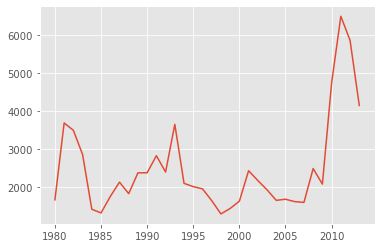

In [41]:
haiti.plot()

In [42]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

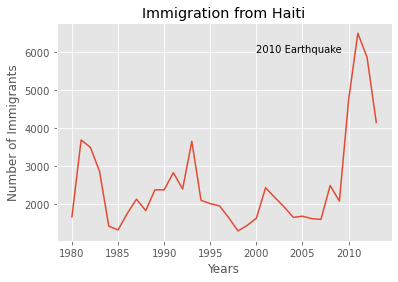

In [43]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 

Compare the number of immigrants from India and China from 1980 to 2013.
Step 1: Get the data set for China and India, and display the dataframe.

In [44]:
df_CI = df_can.loc[['India', 'China'], years]
df_CI

1980  1981  1982  1983  1984  1985  1986   1987   1988   1989  ...  \
India  8880  8670  8147  7338  5704  4211  7150  10189  11522  10343  ...   
China  5123  6682  3308  1863  1527  1816  1960   2643   2758   4323  ...   

        2004   2005   2006   2007   2008   2009   2010   2011   2012   2013  
India  28235  36210  33848  28742  28261  29456  34235  27509  30933  33087  
China  36619  42584  33518  27642  30037  29622  30391  28502  33024  34129  

[2 rows x 34 columns]

<AxesSubplot:>

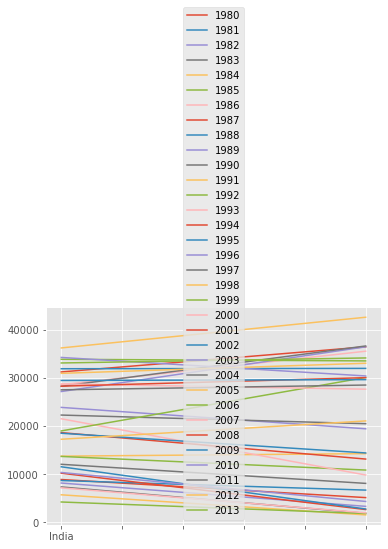

In [45]:
df_CI.plot(kind='line')

In [46]:
df_CI = df_CI.transpose()
df_CI.head()

India  China
1980   8880   5123
1981   8670   6682
1982   8147   3308
1983   7338   1863
1984   5704   1527

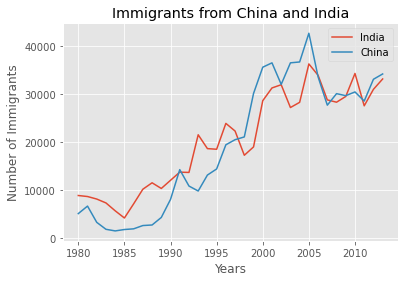

In [47]:
df_CI.index = df_CI.index.map(int) 
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

The trend of top 5 countries that contributed the most to immigration.


In [48]:
inplace = True # paramemter saves the changes to the original df_can dataframe
df_can.sort_values(by='Total', ascending=False, axis=0, inplace=True)

df_top5 = df_can.head(5)

df_top5 = df_top5[years].transpose() 

print(df_top5)

      India  China  United Kingdom of Great Britain and Northern Ireland  \
1980   8880   5123                                              22045      
1981   8670   6682                                              24796      
1982   8147   3308                                              20620      
1983   7338   1863                                              10015      
1984   5704   1527                                              10170      
1985   4211   1816                                               9564      
1986   7150   1960                                               9470      
1987  10189   2643                                              21337      
1988  11522   2758                                              27359      
1989  10343   4323                                              23795      
1990  12041   8076                                              31668      
1991  13734  14255                                              23380      
1992  13673 

### Thank you!